## Computer Vision Exercise - Camera Calibration

---

**Aluno: Marco Túlio de Pinho Tavares Tristão**

Nesse exercícios, nós calibramos uma câmera usando o algoritmo aprendido em sala de aula. Para a calibração, foi usada a imagem abaixo.

<img src="https://imgur.com/qUejc04.jpg" width="400" height="200" alt="Calibration pattern" />

### Calibration Using Octave Toolbox

<div style="display: flex; gap: 20px;">
    <img src="https://imgur.com/v6CKvYd.jpg" width="500" height="400" alt="Extrinsic Camera-Centric" />
    <img src="https://imgur.com/xB2895e.jpg" width="500" height="400" alt="Extrinsic World-Centric" />
</div>

---

#### Calibration Results After Optimization (with Uncertainties)

- *Focal Length:*
  `fc = [931.27021, 906.44732]` ± `[35.70508, 40.87115]`

- *Principal Point:*
  `cc = [654.84478, 351.37815]` ± `[39.52947, 52.34648]`

- *Skew:*
  `alpha_c = [0.00000]` ± `[0.00000]`  
  → Angle between pixel axes = 90.00000° ± 0.00000°

- *Distortion Coefficients:*
  `kc = [0.04727, -0.59097, 0.01334, 0.00384, 0.00000]` ± `[0.13459, 0.64070, 0.01787, 0.01124, 0.00000]`


### Calibration using SVD

In [221]:
import numpy as np
import cv2 as cv
import glob
import scipy.linalg as linalg
from matplotlib import pyplot as plt

np.set_printoptions(threshold=np.inf)

Nós obtemos os pontos da imagem por meio da ferramenta Octave e os reutilizamos aqui.

In [222]:
# Image points

img_points = []
for fname in glob.glob('img_points/*.csv'):
    print(fname)
    corners = np.loadtxt(fname, delimiter='\t').T
    img_points.append(corners)
img_points = np.array(img_points, dtype=np.float64).reshape(-1, 2)

img_points/x1.csv
img_points/x2.csv
img_points/x3.csv


Podemos observar abaixo que os pontos capturam corretamente as quinas do tabuleiro.

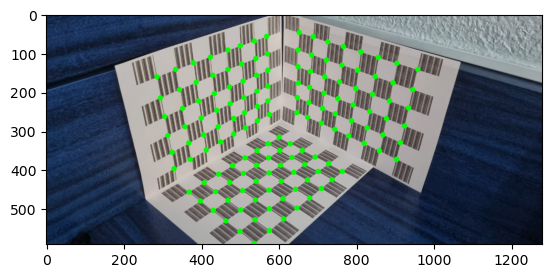

In [223]:
fname = 'imgs/calibration-pattern.jpg'

img = cv.imread(fname, cv.COLOR_BGR2RGB)

green = (0, 255, 0)
for corner in img_points:
    corner = tuple(int(c) for c in corner)
    cv.circle(img, corner, 7, green, -1)
plt.imshow(img)
plt.show()

Abaixo definimos o conjunto de coordenadas do tabuleiro em relação ao mundo. Veja que cada quadrado possui um lado de 30 milímetros e os pontos possuem um offset em relação à origem do sistema devido à largura das bordas das folhas.

In [224]:
# World points

# Obter todos os pontos normalmente e depois ordenar eles da maneira específica para cada plano.
# Os pontos são da forma (x, y, z)

# Plane 1
x0 = [50, 0, 38]
corners1 = []

for i in range(6):
    for j in range(8):
        corners1.append((x0[0] + j * 30, x0[1], x0[2] + i * 30))
corners1.sort(key=lambda x: (x[0], x[2]))
print(f"{len(corners1)=} {corners1=}")

# Plane 2
x0 = [35, 33, 0]
corners2 = []

for i in range(6):
    for j in range(8):
        corners2.append((x0[0] + j * 30, x0[1] + i * 30, x0[2]))
corners2.sort(key=lambda x: (x[0], -x[1]))
print(f"{len(corners2)=} {corners2=}")

# Plane 3
x0 = [0, 33, 35]
corners3 = []

for i in range(6):
    for j in range(8):
        corners3.append((x0[0], x0[1] + i * 30, x0[2] + j * 30))
corners3.sort(key=lambda x: (-x[2], -x[1]))
print(f"{len(corners3)=} {corners3=}")


obj_points = np.array(corners1 + corners2 + corners3, dtype=np.float64).reshape(-1, 3)
obj_points = obj_points
obj_points.shape

len(corners1)=48 corners1=[(50, 0, 38), (50, 0, 68), (50, 0, 98), (50, 0, 128), (50, 0, 158), (50, 0, 188), (80, 0, 38), (80, 0, 68), (80, 0, 98), (80, 0, 128), (80, 0, 158), (80, 0, 188), (110, 0, 38), (110, 0, 68), (110, 0, 98), (110, 0, 128), (110, 0, 158), (110, 0, 188), (140, 0, 38), (140, 0, 68), (140, 0, 98), (140, 0, 128), (140, 0, 158), (140, 0, 188), (170, 0, 38), (170, 0, 68), (170, 0, 98), (170, 0, 128), (170, 0, 158), (170, 0, 188), (200, 0, 38), (200, 0, 68), (200, 0, 98), (200, 0, 128), (200, 0, 158), (200, 0, 188), (230, 0, 38), (230, 0, 68), (230, 0, 98), (230, 0, 128), (230, 0, 158), (230, 0, 188), (260, 0, 38), (260, 0, 68), (260, 0, 98), (260, 0, 128), (260, 0, 158), (260, 0, 188)]
len(corners2)=48 corners2=[(35, 183, 0), (35, 153, 0), (35, 123, 0), (35, 93, 0), (35, 63, 0), (35, 33, 0), (65, 183, 0), (65, 153, 0), (65, 123, 0), (65, 93, 0), (65, 63, 0), (65, 33, 0), (95, 183, 0), (95, 153, 0), (95, 123, 0), (95, 93, 0), (95, 63, 0), (95, 33, 0), (125, 183, 0), (125

(144, 3)

In [225]:
# Vemos que o número de pontos é o mesmo, mas a ordem deles é diferente.

print(f"{obj_points.shape=}, {img_points.shape=}")

obj_points.shape=(144, 3), img_points.shape=(144, 2)


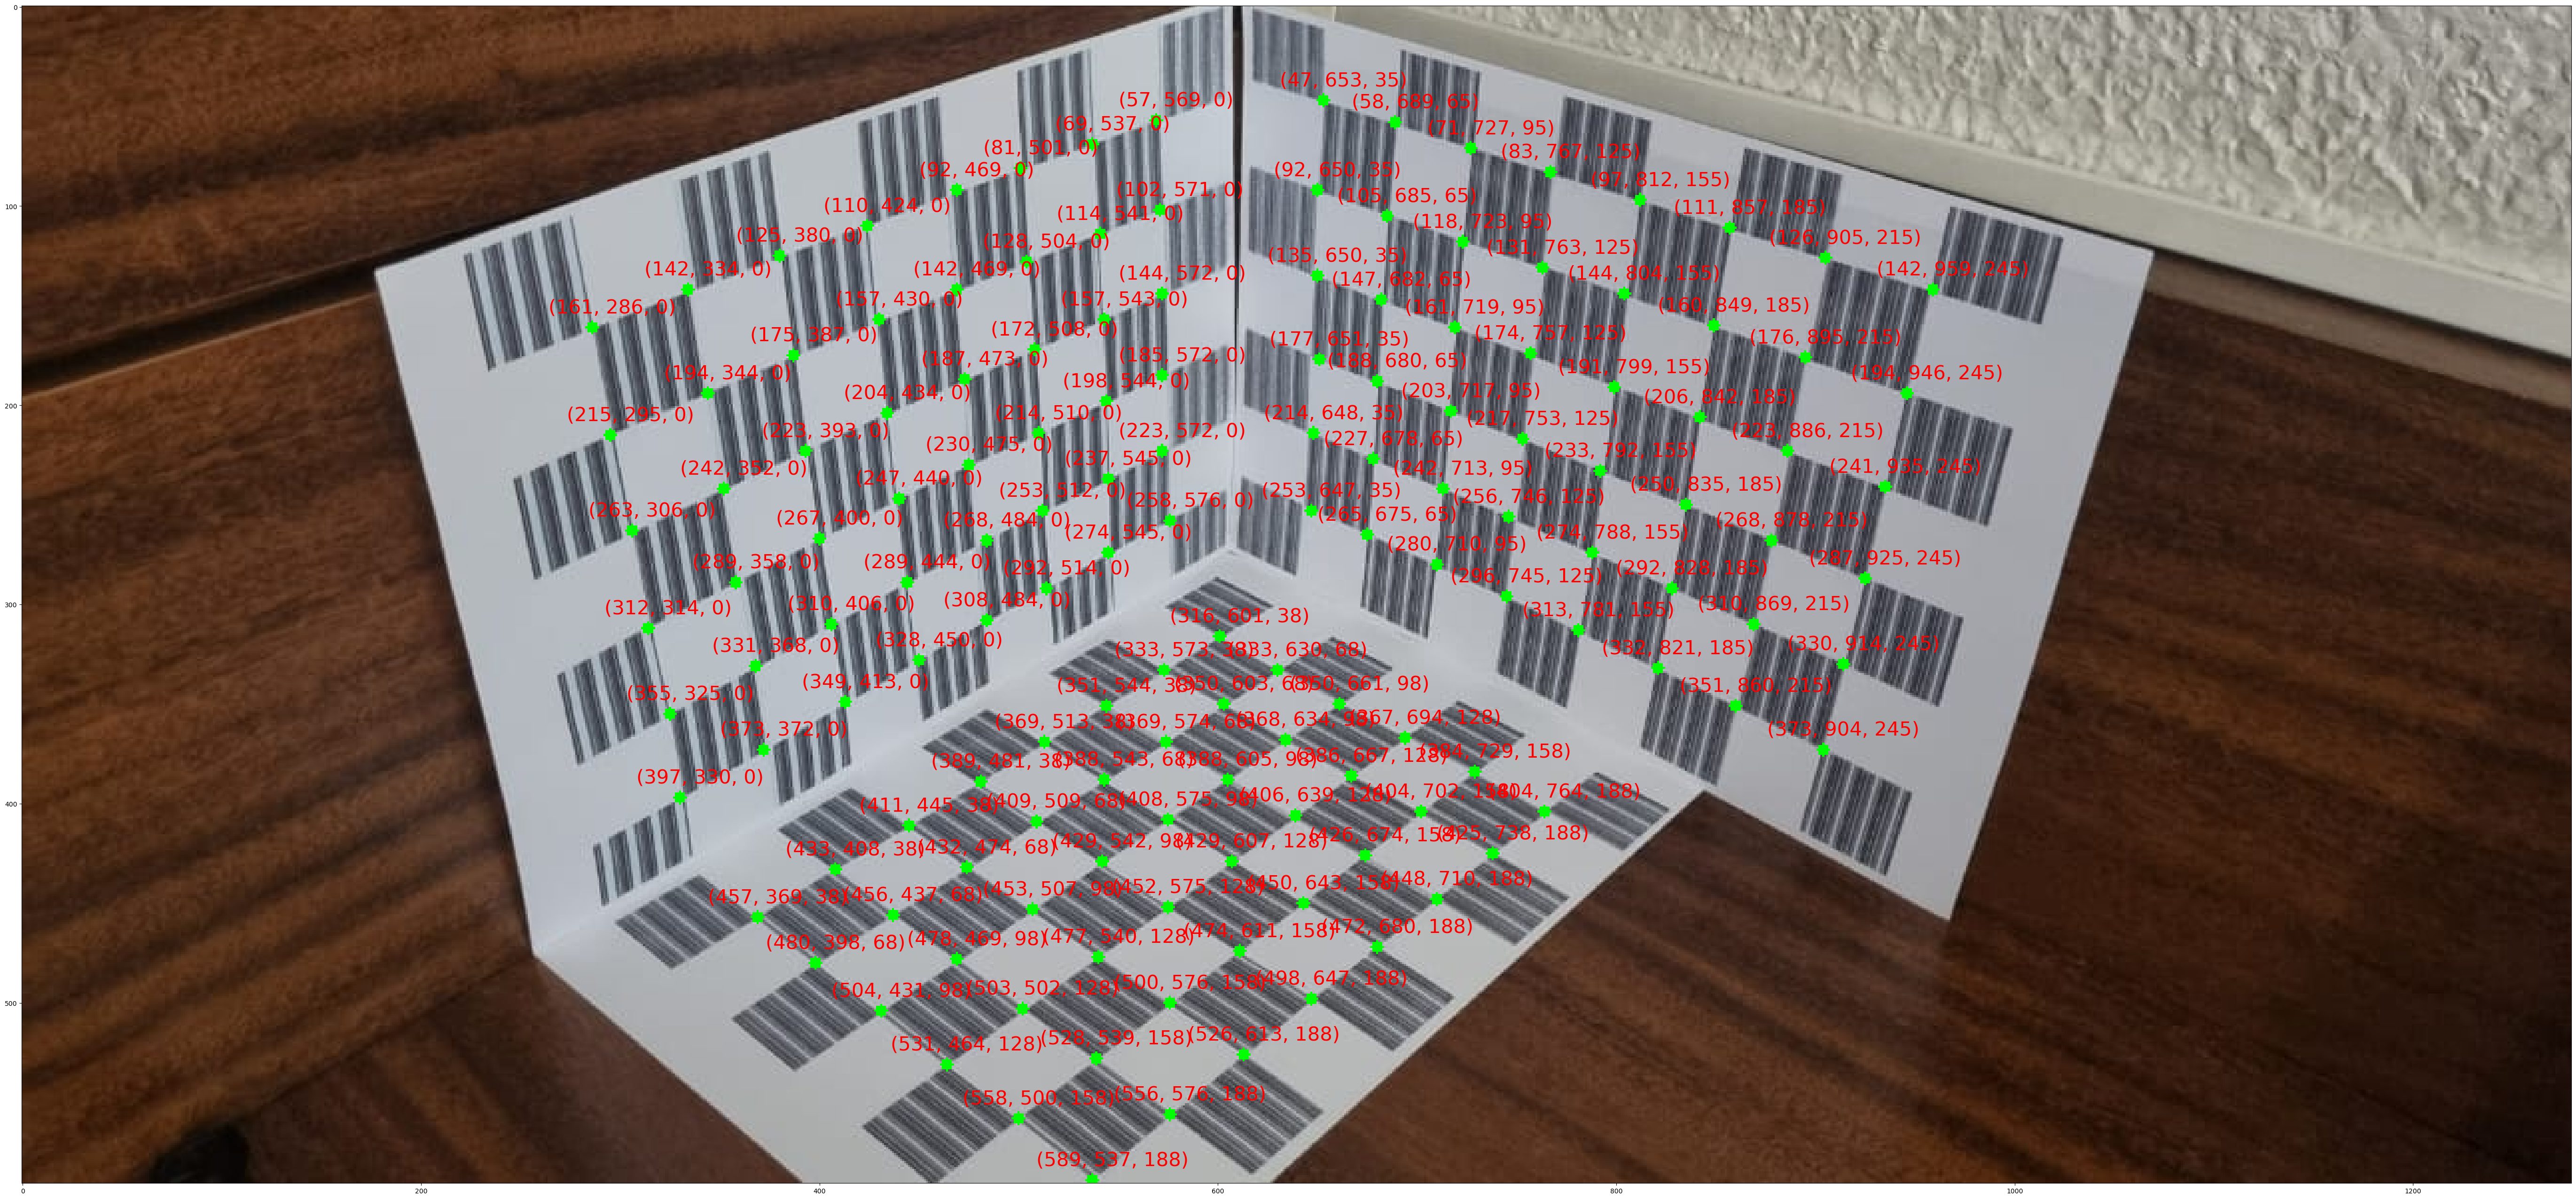

In [226]:
fname = "imgs/calibration-pattern.jpg"

img = cv.imread(fname)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(figsize=(70, 70))

for i in range(len(img_points)):
    corner = tuple(int(c) for c in img_points[i])
    cv.circle(img, corner, 3, green, -1)
    plt.text(corner[0] + 10, corner[1] - 10, f"({int(img_points[i][1])}, {int(img_points[i][0])}, {int(obj_points[i][2])})",
                c='red', fontsize=30, ha='center', va='center')

ax.imshow(img)
plt.show()

Acima é possível ver a correspondência correta entre os pontos da imagem e os pontos do mundo. Com isso em mãos, podemos construir a matriz de homografia e encontrar a matriz de parâmetros intrínsecos da câmera.

In [227]:
def build_dlt_matrix(world_pts, image_pts):
    n = world_pts.shape[0]
    A = []
    for i in range(n):
        X, Y, Z = world_pts[i]
        u, v = image_pts[i]
        A.append([X, Y, Z, 1, 0, 0, 0, 0, -u*X, -u*Y, -u*Z, -u])
        A.append([0, 0, 0, 0, X, Y, Z, 1, -v*X, -v*Y, -v*Z, -v])
    return np.array(A)

obj_points = (obj_points - np.mean(obj_points, axis=0)) / np.std(obj_points)
A = build_dlt_matrix(obj_points, img_points)
A = A / np.max(np.linalg.svd(A, compute_uv=False))

# Resolver Ax=0 usando SVD
_, _, Vt = np.linalg.svd(A, full_matrices=False)

In [228]:
P = Vt[-1].reshape(3, 4)
P = P / P[2, 3]
print(f"{P=}")

P=array([[-1.27998498e+02, -5.55333236e+01,  5.31378784e+01,
         6.02111308e+02],
       [ 3.12815701e+01, -1.30280353e+02,  2.51395493e+01,
         2.86249551e+02],
       [-6.82740983e-02, -9.17365939e-02, -6.62881785e-02,
         1.00000000e+00]])


In [229]:
M = P[:, :3]  # Parte da esquerda de P

# RQ Decomposition
K, R = linalg.rq(M)

T = np.diag(np.sign(np.diag(K)))
K = K @ T
R = T @ R 

print("Matriz Intrínseca K:")
print(K)

print("Matriz de Rotação R:")
print(R)


Matriz Intrínseca K:
[[127.28671107  -1.996587    78.00837391]
 [  0.         121.58249221  61.65388596]
 [  0.           0.           0.1321782 ]]
Matriz de Rotação R:
[[-0.68088897 -0.02222812  0.73204926]
 [ 0.51921698 -0.71959589  0.46108078]
 [-0.51653068 -0.69403722 -0.50150612]]
